# Simple Linear Regression Model:
The Simple Linear Regression model can be represented using the below equation:

y= a0+a1x+ ε 
Where,

a0= It is the intercept of the Regression line (can be obtained putting x=0)
a1= It is the slope of the regression line, which tells whether the line is increasing or decreasing.
ε = The error term. (For a good model it will be negligible)

Implementation of Simple Linear Regression Algorithm using Python

Problem Statement example for Simple Linear Regression:

Here we are taking a dataset that has two variables: salary (dependent variable) and experience (Independent variable). The goals of this problem is:

We want to find out if there is any correlation between these two variables
We will find the best fit line for the dataset.
How the dependent variable is changing by changing the dependent variable.
In this section, we will create a Simple Linear Regression model to find out the best fitting line for representing the relationship between these two variables.

To implement the Simple Linear regression model in machine learning using Python, we need to follow the below steps:

# Step-1: Data Pre-processing

The first step for creating the Simple Linear Regression model is data pre-processing. We have already done it earlier in this tutorial. But there will be some changes, which are given in the below steps:

First, we will import the three important libraries, which will help us for loading the dataset, plotting the graphs, and creating the Simple Linear Regression model.

In [9]:
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  

Next, we will load the dataset into our code:

In [10]:
data_set= pd.read_csv('Salary_Data.csv')  

In [11]:
data_set

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


The above output shows the dataset, which has two variables: Salary and YearsExperience.

After that, we need to extract the dependent and independent variables from the given dataset. The independent variable is years of experience, and the dependent variable is salary. Below is code for it:

In [12]:
x= data_set.iloc[:, :-1].values  
y= data_set.iloc[:, 1].values   

In the above lines of code, for x variable, we have taken -1 value since we want to remove the last column from the dataset. For y variable, we have taken 1 value as a parameter, since we want to extract the second column and indexing starts from the zero.

By executing the above line of code, we will get the output for X and Y variable as:

In [13]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [14]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In the above output image, we can see the X (independent) variable and Y (dependent) variable has been extracted from the given dataset.

Next, we will split both variables into the test set and training set. We have 30 observations, so we will take 20 observations for the training set and 10 observations for the test set. We are splitting our dataset so that we can train our model using a training dataset and then test the model using a test dataset. The code for this is given below:

In [15]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3, random_state=0)  

By executing the above code, we will get x-test, x-train and y-test, y-train dataset. Consider the below images:

Test-dataset:

In [17]:
x_test,y_test

(array([[ 1.5],
        [10.3],
        [ 4.1],
        [ 3.9],
        [ 9.5],
        [ 8.7],
        [ 9.6],
        [ 4. ],
        [ 5.3],
        [ 7.9]]),
 array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
         55794.,  83088., 101302.]))

Training Dataset:

In [19]:
x_train,y_train

(array([[ 2.9],
        [ 5.1],
        [ 3.2],
        [ 4.5],
        [ 8.2],
        [ 6.8],
        [ 1.3],
        [10.5],
        [ 3. ],
        [ 2.2],
        [ 5.9],
        [ 6. ],
        [ 3.7],
        [ 3.2],
        [ 9. ],
        [ 2. ],
        [ 1.1],
        [ 7.1],
        [ 4.9],
        [ 4. ]]),
 array([ 56642.,  66029.,  64445.,  61111., 113812.,  91738.,  46205.,
        121872.,  60150.,  39891.,  81363.,  93940.,  57189.,  54445.,
        105582.,  43525.,  39343.,  98273.,  67938.,  56957.]))

For simple linear Regression, we will not use Feature Scaling. Because Python libraries take care of it for some cases, so we don't need to perform it here. Now, our dataset is well prepared to work on it and we are going to start building a Simple Linear Regression model for the given problem.

# Step-2: Fitting the Simple Linear Regression to the Training Set:

Now the second step is to fit our model to the training dataset. To do so, we will import the LinearRegression class of the linear_model library from the scikit learn. After importing the class, we are going to create an object of the class named as a regressor. The code for this is given below:

In [20]:
#Fitting the Simple Linear Regression model to the training dataset  
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In the above code, we have used a fit() method to fit our Simple Linear Regression object to the training set. In the fit() function, we have passed the x_train and y_train, which is our training dataset for the dependent and an independent variable. We have fitted our regressor object to the training set so that the model can easily learn the correlations between the predictor and target variables. After executing the above lines of code, we will get the below output.

# Step: 3. Prediction of test set result:

dependent (salary) and an independent variable (Experience). So, now, our model is ready to predict the output for the new observations. In this step, we will provide the test dataset (new observations) to the model to check whether it can predict the correct output or not.

We will create a prediction vector y_pred, and x_pred, which will contain predictions of test dataset, and prediction of training set respectively.

In [21]:
#Prediction of Test and Training set result  
y_pred= regressor.predict(x_test)  
x_pred= regressor.predict(x_train)  

On executing the above lines of code, two variables named y_pred and x_pred will generate in the variable explorer options that contain salary predictions for the training set and test set.

Output:

You can check the variable by clicking on the variable explorer option in the IDE, and also compare the result by comparing values from y_pred and y_test. By comparing these values, we can check how good our model is performing.

In [23]:
y_pred,x_pred

(array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
        115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
         76349.68719258, 100649.1375447 ]),
 array([ 53919.42532909,  74480.49870396,  56723.20806202,  68872.93323808,
        103452.92027763,  90368.60085726,  38965.91742009, 124948.58789682,
         54854.0195734 ,  47377.2656189 ,  81957.25265845,  82891.84690277,
         61396.17928358,  56723.20806202, 110929.67423213,  45508.07713028,
         37096.72893147,  93172.3835902 ,  72611.31021533,  64199.96201652]))

# Step: 4. visualizing the Training set results:

Now in this step, we will visualize the training set result. To do so, we will use the scatter() function of the pyplot library, which we have already imported in the pre-processing step. The scatter () function will create a scatter plot of observations.

In the x-axis, we will plot the Years of Experience of employees and on the y-axis, salary of employees. In the function, we will pass the real values of training set, which means a year of experience x_train, training set of Salaries y_train, and color of the observations. Here we are taking a green color for the observation, but it can be any color as per the choice.

Now, we need to plot the regression line, so for this, we will use the plot() function of the pyplot library. In this function, we will pass the years of experience for training set, predicted salary for training set x_pred, and color of the line.

Next, we will give the title for the plot. So here, we will use the title() function of the pyplot library and pass the name ("Salary vs Experience (Training Dataset)".

After that, we will assign labels for x-axis and y-axis using xlabel() and ylabel() function.

Finally, we will represent all above things in a graph using show(). The code is given below:

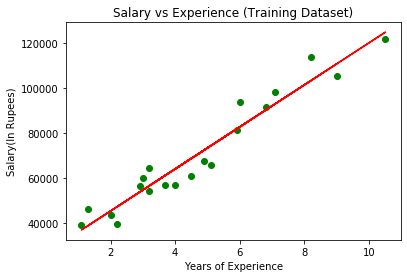

In [24]:
mtp.scatter(x_train, y_train, color="green")   
mtp.plot(x_train, x_pred, color="red")    
mtp.title("Salary vs Experience (Training Dataset)")  
mtp.xlabel("Years of Experience")  
mtp.ylabel("Salary(In Rupees)")  
mtp.show()   

In the above plot, we can see the real values observations in green dots and predicted values are covered by the red regression line. The regression line shows a correlation between the dependent and independent variable.

The good fit of the line can be observed by calculating the difference between actual values and predicted values. But as we can see in the above plot, most of the observations are close to the regression line, hence our model is good for the training set.

# Step: 5. visualizing the Test set results:

In the previous step, we have visualized the performance of our model on the training set. Now, we will do the same for the Test set. The complete code will remain the same as the above code, except in this, we will use x_test, and y_test instead of x_train and y_train.

Here we are also changing the color of observations and regression line to differentiate between the two plots, but it is optional.

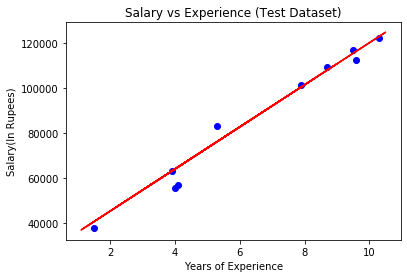

In [25]:
#visualizing the Test set results  
mtp.scatter(x_test, y_test, color="blue")   
mtp.plot(x_train, x_pred, color="red")    
mtp.title("Salary vs Experience (Test Dataset)")  
mtp.xlabel("Years of Experience")  
mtp.ylabel("Salary(In Rupees)")  
mtp.show() 

In the above plot, there are observations given by the blue color, and prediction is given by the red regression line. As we can see, most of the observations are close to the regression line, hence we can say our Simple Linear Regression is a good model and able to make good predictions.

#########################################################################################################################

# Multiple Linear Regression

In the above topic, we have learned about Simple Linear Regression, where a single Independent/Predictor(X) variable is used to model the response variable (Y). But there may be various cases in which the response variable is affected by more than one predictor variable; for such cases, the Multiple Linear Regression algorithm is used.

Moreover, Multiple Linear Regression is an extension of Simple Linear regression as it takes more than one predictor variable to predict the response variable. We can define it as:

Multiple Linear Regression is one of the important regression algorithms which models the linear relationship between a single dependent continuous variable and more than one independent variable.

Some key points about MLR:

For MLR, the dependent or target variable(Y) must be the continuous/real, but the predictor or independent variable may be of continuous or categorical form.
Each feature variable must model the linear relationship with the dependent variable.
MLR tries to fit a regression line through a multidimensional space of data-points.

MLR equation:
In Multiple Linear Regression, the target variable(Y) is a linear combination of multiple predictor variables x1, x2, x3, ...,xn. Since it is an enhancement of Simple Linear Regression, so the same is applied for the multiple linear regression equation, the equation becomes:

Y= b<sub>0</sub>+b<sub>1</sub>x<sub>1</sub>+ b<sub>2</sub>x<sub>2</sub>+ b<sub>3</sub>x<sub>3</

Where,

Y= Output/Response variable

b0, b1, b2, b3 , bn....= Coefficients of the model.

x1, x2, x3, x4,...= Various Independent/feature variable

Where,

Y= Output/Response variable

b0, b1, b2, b3 , bn....= Coefficients of the model.

x1, x2, x3, x4,...= Various Independent/feature variable

# Implementation of Multiple Linear Regression model using Python:



In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
dataset = pd.read_excel('comPU_list.xlsx')
dataset.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,R&D Spend,Administration,Marketing Spend,State,Profit
0,NaN,NaN,NaN,NaN,NaN,165349.20,136897.80,471784.10,New York,192261.83
1,NaN,NaN,NaN,NaN,NaN,162597.70,151377.59,443898.53,California,191792.06
2,NaN,NaN,NaN,NaN,NaN,153441.51,101145.55,407934.54,Florida,191050.39
3,NaN,NaN,NaN,NaN,NaN,144372.41,118671.85,383199.62,New York,182901.99
4,NaN,NaN,NaN,NaN,NaN,142107.34,91391.77,366168.42,Florida,166187.94


In [70]:
dataset.drop(columns=["Unnamed: 0","Unnamed: 1","Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)# dropping the unnamed colums

In [72]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Thus, in the above-shown sample of the dataset, we notice that there are 3 independent variables – R&D spend, Administration and marketing spend.

They contribute to the calculation of the dependent variable – Profit.

# Data-preprocessing
Building the matrix of features and dependent vector.

Here, the matrix of features is the matrix of independent variables.

In [75]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,4].values

In [79]:
X,y

(array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
         1.3689780e+05, 4.7178410e+05],
        [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
         1.5137759e+05, 4.4389853e+05],
        [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
         1.0114555e+05, 4.0793454e+05],
        [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
         1.1867185e+05, 3.8319962e+05],
        [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
         9.1391770e+04, 3.6616842e+05],
        [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
         9.9814710e+04, 3.6286136e+05],
        [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
         1.4719887e+05, 1.2771682e+05],
        [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3029813e+05,
         1.4553006e+05, 3.2387668e+05],
        [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+05,
         1.4871895e+05, 3.1161329e+05],
        [1.0000000e

Encoding the categorical variables

We have categorical variables in this model. ‘State’ is a categorical variable. We will be using Label Encoder.

In [77]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelEncoder_X = LabelEncoder() 
X[:,3] = labelEncoder_X.fit_transform(X[ : , 3])
 
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X), dtype=np.float)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [80]:
X

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
        9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 3.2387668e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+05,
        1.4871895e+05, 3.1161329e+05],
       [1.0000000e+00, 0.0000000e+00,

We have performed Label Encoding first because One hot encoding can be performed only after converting into numerical data. We need numbers to create dummy variables.

# Avoiding the dummy variable trap

In the below code, we removed the first column from X but put all rows. We ignore only index 0. This is to avoid the dummy variable trap.

In [83]:
X = X[:, 1:]

In [84]:
X

array([[1.0000000e+00, 1.6534920e+05, 1.3689780e+05, 4.7178410e+05],
       [0.0000000e+00, 1.6259770e+05, 1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.5344151e+05, 1.0114555e+05, 4.0793454e+05],
       [1.0000000e+00, 1.4437241e+05, 1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.4210734e+05, 9.1391770e+04, 3.6616842e+05],
       [1.0000000e+00, 1.3187690e+05, 9.9814710e+04, 3.6286136e+05],
       [0.0000000e+00, 1.3461546e+05, 1.4719887e+05, 1.2771682e+05],
       [0.0000000e+00, 1.3029813e+05, 1.4553006e+05, 3.2387668e+05],
       [1.0000000e+00, 1.2054252e+05, 1.4871895e+05, 3.1161329e+05],
       [0.0000000e+00, 1.2333488e+05, 1.0867917e+05, 3.0498162e+05],
       [0.0000000e+00, 1.0191308e+05, 1.1059411e+05, 2.2916095e+05],
       [0.0000000e+00, 1.0067196e+05, 9.1790610e+04, 2.4974455e+05],
       [0.0000000e+00, 9.3863750e+04, 1.2732038e+05, 2.4983944e+05],
       [0.0000000e+00, 9.1992390e+04, 1.3549507e+05, 2.5266493e+05],
       [0.0000000e+00, 1.1994324e+

# Splitting the test and train set

Generally, we will consider 20% of the dataset to be test set and 80% to be the training set. By training set we mean, we train our model according to these parameters and perform test on the “test set” and check if the output of our testing matches the output given in the dataset earlier.

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting the model

In [86]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predicting the test set results
We create a vector containing all the predictions of the test set profit. The predicted profits are then put into the vector called y_pred.(contains prediction for all observations in the test set).

‘predict’ method makes the predictions for test set. Hence, input is the test set. The parameter for predict must be an array or sparse matrix, hence input is X_test.

In [87]:
y_pred = regressor.predict(X_test)
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [88]:
y_pred

array([103615.70496732, 132245.69745432, 133070.23906339,  72592.46097845,
       179075.96157176, 116014.3380813 ,  67853.79186105,  98837.47482921,
       114480.26282341, 168492.58649243])

The model-fit until now need not be the optimal model for the dataset. When we built the model, we used all the independent variables.

But what if among these independent variables there are some statistically significant (having a great impact) dependent variables?

What if we also have some variables that are not significant at all?

Hence we need an optimal team of independent variables so that each independent variable is powerful and statistically significant and definitely has an effect.

This effect can be positive (decrease in 1 unit of the independent variable, profit will increase) or negative (increase in 1 unit of the independent variable, profit will decrease).

We will perform backward elimination using stats model. But this topic will not be discussed in this article.

# Conclusion
To quickly conclude, the advantages of using linear regression is that it works on any size of the dataset and gives information about the relevance of features. However, these models work on certain assumptions which can be seen as a disadvantage.